# **The service data for the vehicles**

**1. Import library**

In [106]:
import pandas as pd
from datetime import datetime
import missingno as miss
import matplotlib.pyplot as plt
import seaborn as sns

**2. Load the data**

In [107]:
august_data = pd.read_excel("Alt - Aug'23 Service record.xlsx")
october_data = pd.read_excel("Alt - Oct'23 Service record.xlsx")
january_data = pd.read_excel("ALT -Repair Order Summary-Jan-24.xlsx")
february_data = pd.read_excel("ALT Mobility Feb-24.xlsx")
service_history_data = pd.read_excel("Service History-Bangalore, Delhi, Hyderabad.xlsx")

In [108]:
df = pd.concat([august_data, october_data, january_data, february_data], ignore_index=True)
df.shape

(1659, 41)

In [109]:
df.head()

,Job Card,Job Card Date,Region,Company,State,City,Branch,Branch Code,Dealer Code,Make,Model,Model Name,Registration No,Chassis No,Customer,KM Reading,Repair Type,Parts Value,Inside Service Value,Outside Service Value,Basic Amount,Discount,CGST%,CGST,IGST%,IGST,SGST%,SGST,Work Status,Total Amount,ALT Mob,Repair order,VIN,Customer Name,Part/Service Name,Amount,Part/Labour Group,Sale Date,Lost Sale Value,Job Card Status,ALT
0,EVRJC000123853,2023-08-31 17:13:12.383,South,Magnum Ventures,Karnataka,Bengaluru,Magnum Ventures - H.O,300001.0,100001.0,AltiGreen,T01CLR382011ZO,neEV Tez ZO,KA04AD0863,MD93WD6CZPC515110,Exponent Energy Private Limited,363.0,Accidental Paid,8849.010,1250.0,22500.0,32599.010,0.0,9.0,2952.00,NaN,NaN,9.0,2952.00,"22/22 Parts Job Done , 10/10 RO Job Done , 2/2...",38503.010,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,EVRJC000123850,2023-08-31 14:16:07.467,South,Magnum Ventures,Karnataka,Bengaluru,Magnum Ventures - H.O,300001.0,100001.0,AltiGreen,T01CLR382011ZO,neEV Tez ZO,KA04AD0423,MD93WD6CZPC515102,Exponent Energy Private Limited,6386.0,Paid,48.310,800.0,0.0,848.310,0.0,9.0,76.35,NaN,NaN,9.0,76.35,"1/1 Parts Job Done , 3/3 RO Job Done.",1001.010,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,EVRJC000123846,2023-08-31 09:37:03.303,South,Magnum Ventures,Karnataka,Bengaluru,Magnum Ventures - H.O,300001.0,100001.0,AltiGreen,T01CLR382011ZO,neEV Tez ZO,KA04AD0105,MD93WD6CZPB515361,PI Beam Labs Pvt Ltd,6848.0,Warranty,561.020,300.0,0.0,861.020,0.0,9.0,77.49,NaN,NaN,9.0,77.49,"1/1 Parts Job Done , 2/2 RO Job Done.",1016.000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,EVRJC000123845,2023-08-30 17:40:14.740,South,Magnum Ventures,Karnataka,Bengaluru,Magnum Ventures - H.O,300001.0,100001.0,AltiGreen,T01CLR382011ZO,neEV Tez ZO,KA04AD0113,MD93WD6CZPB515431,PI Beam Labs Pvt Ltd,6487.0,Third Free Service,2535.362,1350.0,0.0,3885.362,0.0,9.0,460.63,NaN,NaN,9.0,460.63,"4/4 Parts Job Done , 2/2 RO Job Done.",4806.622,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,EVRJC000323547,2023-08-30 16:26:53.637,North,Sai Shreeja Auto LLP,Delhi,Delhi.,Sai Shreeja Auto LLP - H.O,300003.0,100003.0,AltiGreen,N01CHDX3110011ZO,neEV HDx ZO,DL51GD5264,MD93WD6CZNL515068,Magenta EV Solutions Pvt Ltd,20478.0,Running Repair,0.000,0.0,0.0,0.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1/1 RO Job Done.,0.000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


**3. Data Cleaning**

In [110]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

,Job Card,Job Card Date,Region,Company,State,City,Branch,Branch Code,Dealer Code,Make,Model,Model Name,Registration No,Chassis No,Customer,KM Reading,Repair Type,Parts Value,Inside Service Value,Outside Service Value,Basic Amount,Discount,CGST%,CGST,IGST%,IGST,SGST%,SGST,Work Status,Total Amount,ALT Mob,Repair order,VIN,Customer Name,Part/Service Name,Amount,Part/Labour Group,Sale Date,Lost Sale Value,Job Card Status,ALT
366,NaN,2023-10-07 15:23:56.757,South,NaN,Karnataka,Bengaluru,NaN,NaN,NaN,AltiGreen,Tez,NaN,KA04AD0278,NaN,NaN,9556.0,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.4,NaN,EVRJC0001231114,MD93WD6CZPC515030,PI Beam Labs Pvt Ltd,ORVM Mirror fitment,30.0,Labour,NaT,NaN,NaN,NaN
593,NaN,2023-10-12 10:33:28.600,South,NaN,Karnataka,Bengaluru,NaN,NaN,NaN,AltiGreen,Tez,NaN,KA04AD0285,NaN,NaN,11083.0,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.0,NaN,EVRJC0001231146,MD93WD6CZPC515026,PI Beam Labs Pvt Ltd,Rear wheel hub / drum replacement (per wheel),150.0,Labour,NaT,NaN,NaN,NaN
881,NaN,2023-10-28 16:35:58.773,South,NaN,Karnataka,Bengaluru,NaN,NaN,NaN,AltiGreen,Tez,NaN,KA04AD0092,NaN,NaN,9431.0,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,EVRJC0001231271,MD93WD6CZPB515492,PI Beam Labs Pvt Ltd,ORVM Mirror fitment,50.0,Labour,NaT,NaN,NaN,NaN
999,NaN,2023-10-31 12:23:05.727,North,NaN,HARYANA,GURUGRAM,NaN,NaN,NaN,AltiGreen,neEV HDx,NaN,3IM22K01001103,NaN,NaN,16084.0,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,NaN,EVRJC004623104,MD93WD6CGNL515183,ELEKTROWAGEN MOTORS THREE LLP,Front Shock Absorber Replacement (1 No),100.0,Labour,NaT,NaN,NaN,NaN


In [111]:
df = df.drop_duplicates()

In [112]:
df.columns

Index(['Job Card', 'Job Card Date', 'Region', 'Company', 'State', 'City',
       'Branch', 'Branch Code', 'Dealer Code', 'Make', 'Model', 'Model Name',
       'Registration No', 'Chassis No', 'Customer', 'KM Reading',
       'Repair Type', 'Parts Value', 'Inside Service Value',
       'Outside Service Value', 'Basic Amount', 'Discount', 'CGST%', 'CGST',
       'IGST%', 'IGST', 'SGST%', 'SGST', 'Work Status', 'Total Amount',
       'ALT Mob', 'Repair order', 'VIN', 'Customer Name', 'Part/Service Name',
       'Amount', 'Part/Labour Group', 'Sale Date', 'Lost Sale Value',
       'Job Card Status', 'ALT'],
      dtype='object')

In [113]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

Job Card                 47.915408
Job Card Date             0.000000
Region                    0.000000
Company                  47.915408
State                     0.000000
City                      0.000000
Branch                   47.915408
Branch Code              47.915408
Dealer Code              47.915408
Make                      0.000000
Model                     0.000000
Model Name               47.915408
Registration No           0.000000
Chassis No               47.915408
Customer                 47.915408
KM Reading                0.060423
Repair Type               0.000000
Parts Value              47.915408
Inside Service Value     47.915408
Outside Service Value    47.915408
Basic Amount             47.915408
Discount                 47.915408
CGST%                    57.099698
CGST                     57.099698
IGST%                    95.770393
IGST                     95.770393
SGST%                    57.099698
SGST                     57.099698
Work Status         

In [114]:
col_for_drop = null_percent[null_percent>80].keys()
col_for_drop

Index(['IGST%', 'IGST', 'ALT'], dtype='object')

In [115]:
df = df.drop(columns = col_for_drop)
df.shape

(1655, 38)

<Axes: xlabel='Parts Value'>

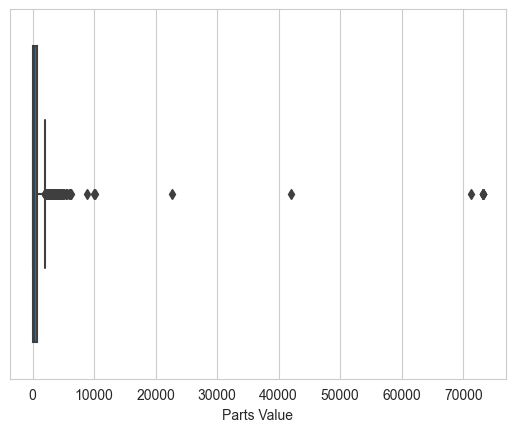

In [116]:
sns.boxplot(x=df['Parts Value'])

<Axes: xlabel='Outside Service Value'>

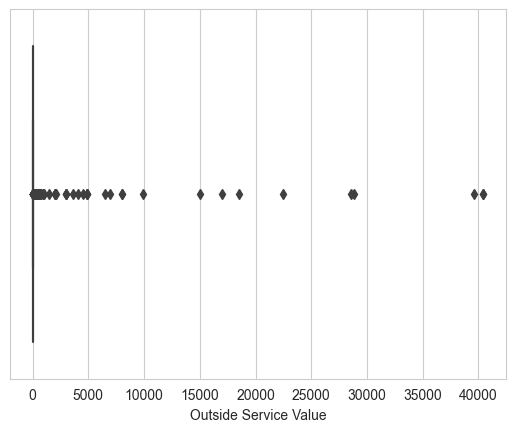

In [117]:
sns.boxplot(x=df['Outside Service Value'])

<Axes: xlabel='Basic Amount'>

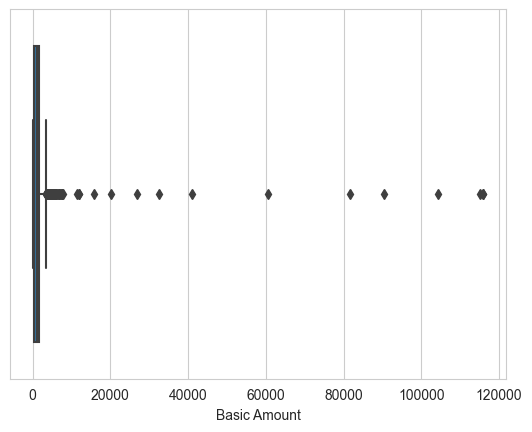

In [118]:
sns.boxplot(x=df['Basic Amount'])

<Axes: xlabel='CGST'>

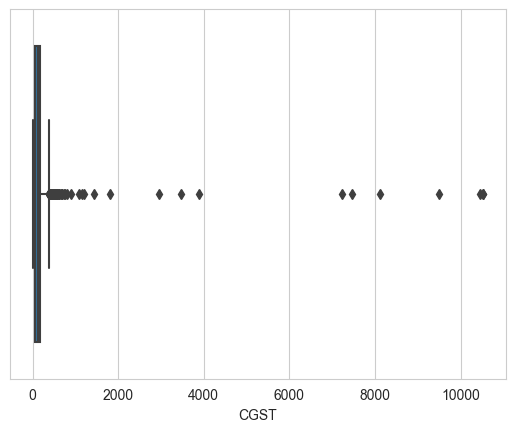

In [119]:
sns.boxplot(x=df['CGST'])

<Axes: xlabel='SGST'>

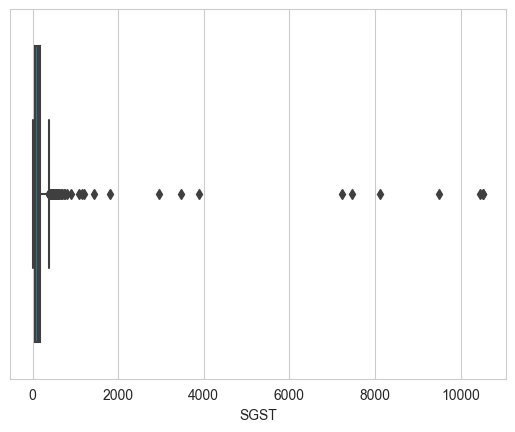

In [120]:
sns.boxplot(x=df['SGST'])

<Axes: xlabel='Total Amount'>

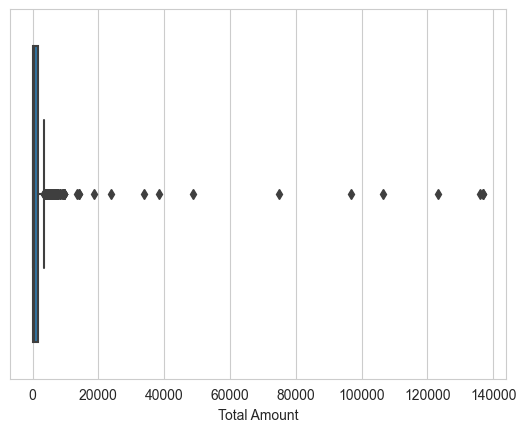

In [121]:
sns.boxplot(x=df['Total Amount'])

In [122]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [123]:
df.dtypes

Job Card                         object
Job Card Date            datetime64[ns]
Region                           object
Company                          object
State                            object
City                             object
Branch                           object
Branch Code                     float64
Dealer Code                     float64
Make                             object
Model                            object
Model Name                       object
Registration No                  object
Chassis No                       object
Customer                         object
KM Reading                      float64
Repair Type                      object
Parts Value                     float64
Inside Service Value            float64
Outside Service Value           float64
Basic Amount                    float64
Discount                        float64
CGST%                           float64
CGST                            float64
SGST%                           float64


In [124]:
# Fill missing values in categorical columns 
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns
for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Naman\AppData\Local\Temp\ipykernel_8184\3273813093.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [125]:
# Fill missing values in numeric columns with mean
numeric_columns = df.select_dtypes(exclude=['object']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Print cleaned DataFrame
df.head()

,Job Card,Job Card Date,Region,Company,State,City,Branch,Branch Code,Dealer Code,Make,Model,Model Name,Registration No,Chassis No,Customer,KM Reading,Repair Type,Parts Value,Inside Service Value,Outside Service Value,Basic Amount,Discount,CGST%,CGST,SGST%,SGST,Work Status,Total Amount,ALT Mob,Repair order,VIN,Customer Name,Part/Service Name,Amount,Part/Labour Group,Sale Date,Lost Sale Value,Job Card Status
0,EVRJC000123853,2023-08-31 17:13:12.383,South,Magnum Ventures,Karnataka,Bengaluru,Magnum Ventures - H.O,300001.0,100001.0,AltiGreen,T01CLR382011ZO,neEV Tez ZO,KA04AD0863,MD93WD6CZPC515110,Exponent Energy Private Limited,363.0,Accidental Paid,8849.010,1250.0,22500.0,32599.010,0.0,9.000000,2952.000000,9.000000,2952.000000,"22/22 Parts Job Done , 10/10 RO Job Done , 2/2...",38503.010,Yes,EVRJC000223935,MD93WD6CZNK515862,PI Beam Labs Pvt Ltd,AGP EV Gear Oil [650 ML],481.187997,Part,2023-04-18 00:25:09.190850816,0.830508,Invoiced
1,EVRJC000123850,2023-08-31 14:16:07.467,South,Magnum Ventures,Karnataka,Bengaluru,Magnum Ventures - H.O,300001.0,100001.0,AltiGreen,T01CLR382011ZO,neEV Tez ZO,KA04AD0423,MD93WD6CZPC515102,Exponent Energy Private Limited,6386.0,Paid,48.310,800.0,0.0,848.310,0.0,9.000000,76.350000,9.000000,76.350000,"1/1 Parts Job Done , 3/3 RO Job Done.",1001.010,Yes,EVRJC000223935,MD93WD6CZNK515862,PI Beam Labs Pvt Ltd,AGP EV Gear Oil [650 ML],481.187997,Part,2023-04-18 00:25:09.190850816,0.830508,Invoiced
2,EVRJC000123846,2023-08-31 09:37:03.303,South,Magnum Ventures,Karnataka,Bengaluru,Magnum Ventures - H.O,300001.0,100001.0,AltiGreen,T01CLR382011ZO,neEV Tez ZO,KA04AD0105,MD93WD6CZPB515361,PI Beam Labs Pvt Ltd,6848.0,Warranty,561.020,300.0,0.0,861.020,0.0,9.000000,77.490000,9.000000,77.490000,"1/1 Parts Job Done , 2/2 RO Job Done.",1016.000,Yes,EVRJC000223935,MD93WD6CZNK515862,PI Beam Labs Pvt Ltd,AGP EV Gear Oil [650 ML],481.187997,Part,2023-04-18 00:25:09.190850816,0.830508,Invoiced
3,EVRJC000123845,2023-08-30 17:40:14.740,South,Magnum Ventures,Karnataka,Bengaluru,Magnum Ventures - H.O,300001.0,100001.0,AltiGreen,T01CLR382011ZO,neEV Tez ZO,KA04AD0113,MD93WD6CZPB515431,PI Beam Labs Pvt Ltd,6487.0,Third Free Service,2535.362,1350.0,0.0,3885.362,0.0,9.000000,460.630000,9.000000,460.630000,"4/4 Parts Job Done , 2/2 RO Job Done.",4806.622,Yes,EVRJC000223935,MD93WD6CZNK515862,PI Beam Labs Pvt Ltd,AGP EV Gear Oil [650 ML],481.187997,Part,2023-04-18 00:25:09.190850816,0.830508,Invoiced
4,EVRJC000323547,2023-08-30 16:26:53.637,North,Sai Shreeja Auto LLP,Delhi,Delhi.,Sai Shreeja Auto LLP - H.O,300003.0,100003.0,AltiGreen,N01CHDX3110011ZO,neEV HDx ZO,DL51GD5264,MD93WD6CZNL515068,Magenta EV Solutions Pvt Ltd,20478.0,Running Repair,0.000,0.0,0.0,0.000,1.0,9.049296,259.727704,9.049296,259.727704,1/1 RO Job Done.,0.000,Yes,EVRJC000223935,MD93WD6CZNK515862,PI Beam Labs Pvt Ltd,AGP EV Gear Oil [650 ML],481.187997,Part,2023-04-18 00:25:09.190850816,0.830508,Invoiced


<Axes: >

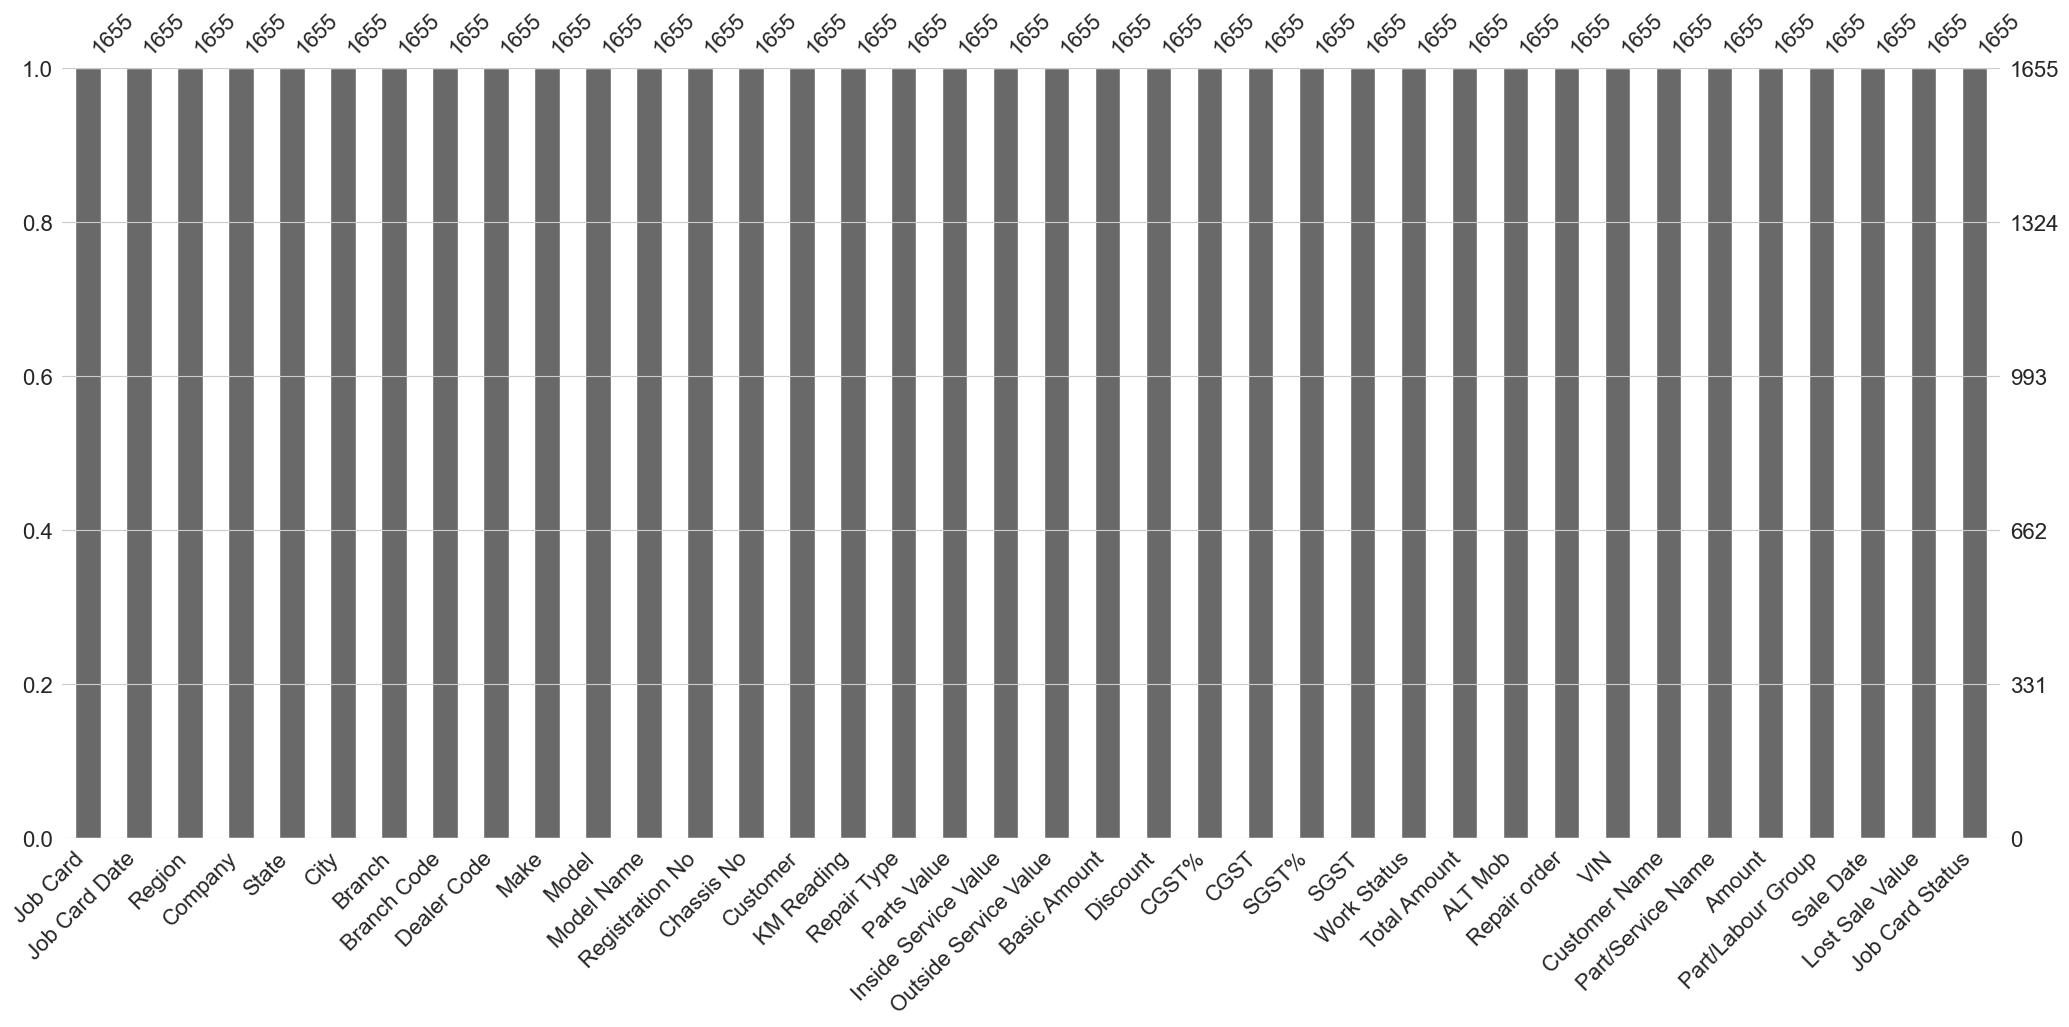

In [126]:
miss.bar(df)

**4. Data Exploration**

Text(0.5, 1.0, 'Heatmap using correlation matrix of vehicles')

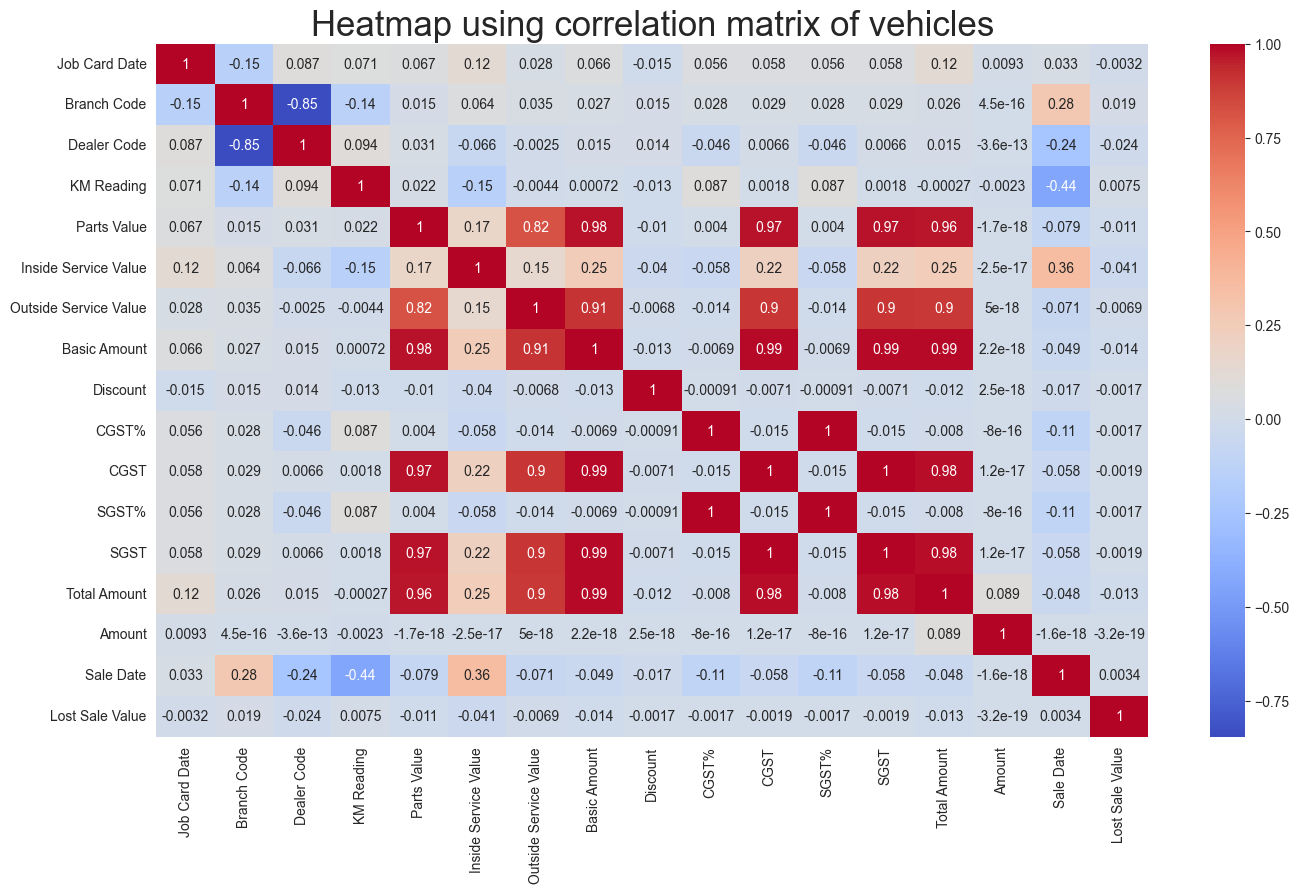

In [127]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9
 
sns.heatmap(df[numeric_columns].corr(), annot = True, cmap ='coolwarm') # show heatmap
 
plt.title("Heatmap using correlation matrix of vehicles", fontsize = 25) # title of heatmap

In [128]:
hig_corr = df[numeric_columns].corr()
hig_corr_features1 = hig_corr.index[abs(hig_corr["Parts Value"]) >= 0.5]
hig_corr_features1

Index(['Parts Value', 'Outside Service Value', 'Basic Amount', 'CGST', 'SGST',
       'Total Amount'],
      dtype='object')

(6.5, -0.5)

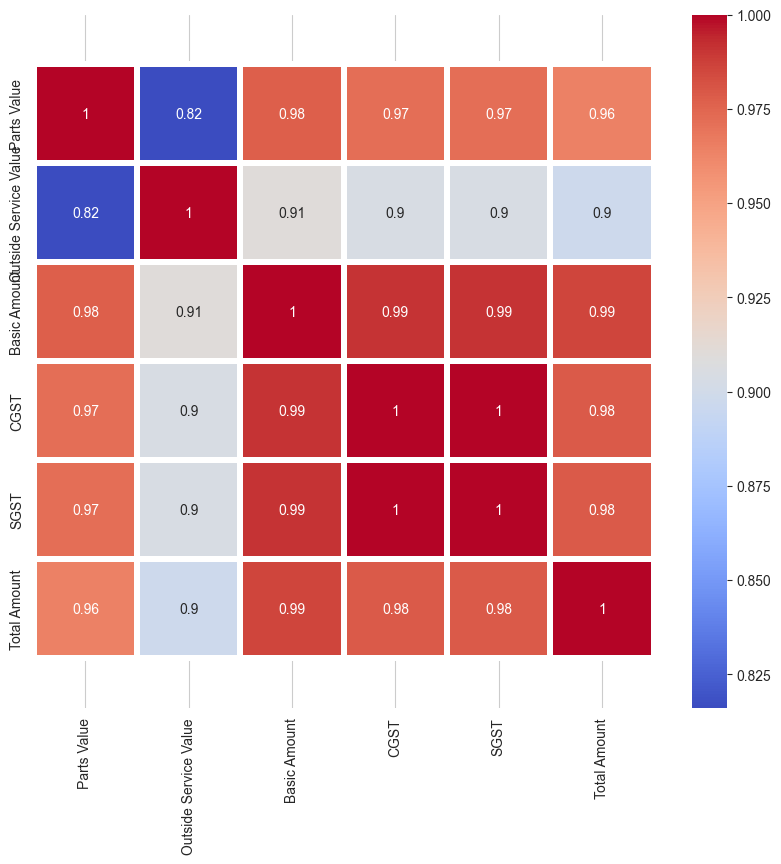

In [129]:
plt.figure(figsize = (10,9))
ax = sns.heatmap(df[hig_corr_features1].corr(), cmap = "coolwarm", annot = True, linewidth =3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+ 0.5, top -0.5)

**5. Linear Pattern observed**

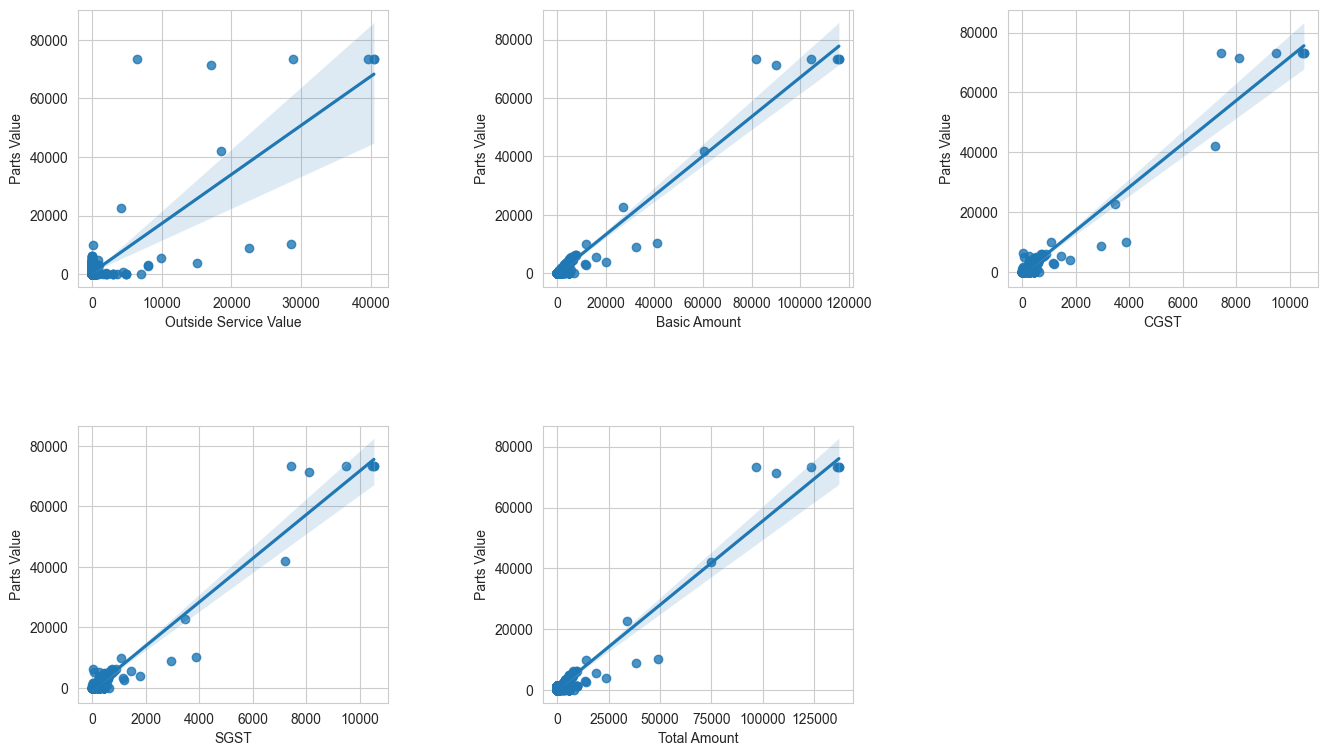

In [130]:
plt.figure(figsize = (16,9))
for i in range(len(hig_corr_features1)):
    if i+1<6:
        plt.subplot(2,3,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features1[i+1], y = "Parts Value")

In [131]:
hig_corr = df[numeric_columns].corr()
hig_corr_features3 = hig_corr.index[abs(hig_corr["Dealer Code"]) >= 0.5]
hig_corr_features3

Index(['Branch Code', 'Dealer Code'], dtype='object')

**6. Pattern observed**

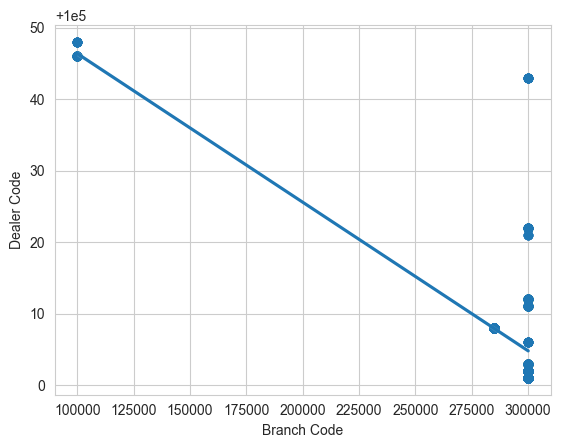

In [132]:
#plt.figure(figsize = (16,9))
for i in range(len(hig_corr_features3)):
    if i<1:
        plt.subplot(1,1,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = df[numeric_columns], x = hig_corr_features3[i], y = "Dealer Code")

In [133]:
df.to_csv('df.csv', index = False)

**7. Mean Time Between Failures (MTBF)**:
   Calculate the time between consecutive failures for each vehicle (based on VIN or Chassis No.) and then find the mean of these times. This will give you an idea of how frequently vehicles experience failures on average.

Mean Time Between Failures (days): 0.12852458592245508


C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


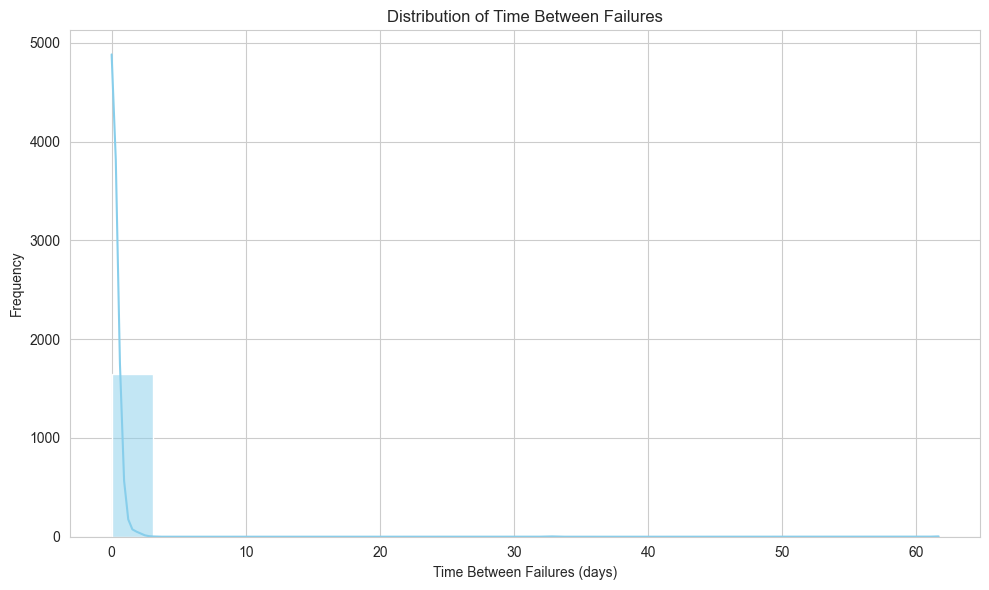

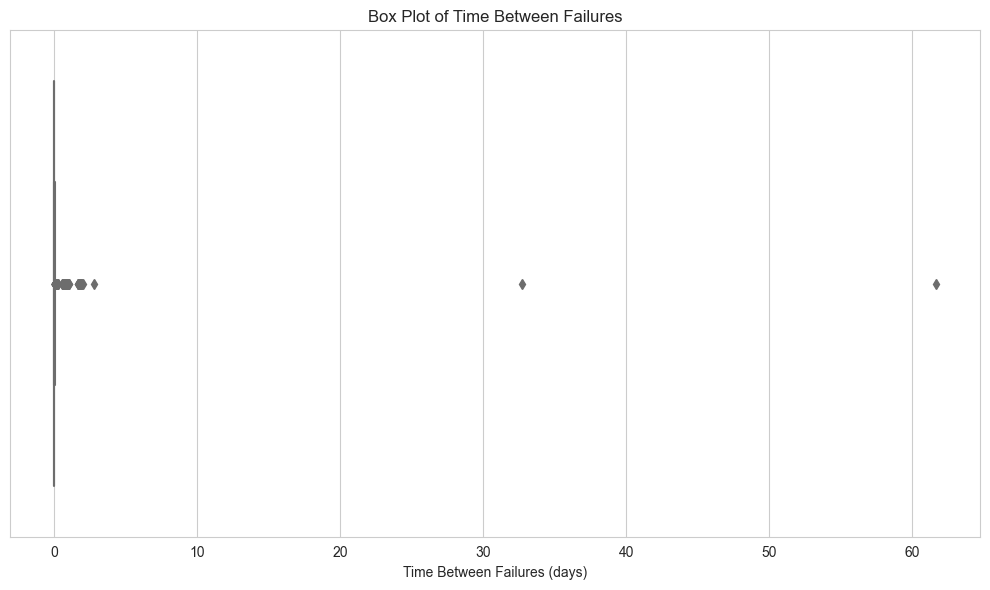

In [134]:
df['Job Card Date'] = pd.to_datetime(df['Job Card Date'], format='%M:%S.%f')

# Sort the DataFrame by Job Card Date
df.sort_values(by='Job Card Date', inplace=True)

# Calculate time between failures
df['Time Between Failures'] = df['Job Card Date'].diff().dt.total_seconds() / (60*60*24)
# Mean time between failures
mean_time_between_failures = df['Time Between Failures'].mean()
print("Mean Time Between Failures (days):", mean_time_between_failures)

# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the histogram of time between failures
plt.figure(figsize=(10, 6))
sns.histplot(df['Time Between Failures'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Time Between Failures')
plt.xlabel('Time Between Failures (days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting the box plot of time between failures
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Time Between Failures'], color='salmon')
plt.title('Box Plot of Time Between Failures')
plt.xlabel('Time Between Failures (days)')
plt.tight_layout()
plt.show()

**8. Most Frequent Spare Part Changed**:
   Count the occurrences of each spare part in the "Part/Service Name" column. The part with the highest count is the most frequently changed spare part.


Most Frequent Spare Part Changed: AGP EV Gear Oil [650 ML]


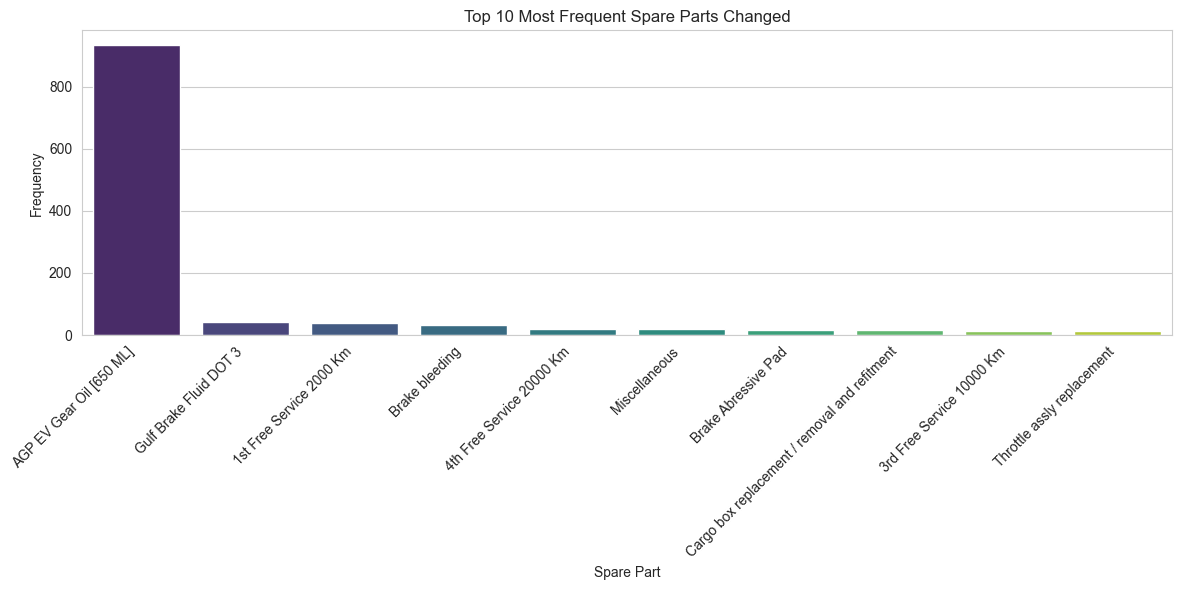

In [135]:
# Most frequent spare part changed
most_frequent_spare_part = df['Part/Service Name'].mode()[0]

print("Most Frequent Spare Part Changed:", most_frequent_spare_part)
# Set the style of seaborn
sns.set_style("whitegrid")

# Count the frequency of each spare part
spare_part_counts = df['Part/Service Name'].value_counts().head(10)

# Plotting the bar plot of spare part frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=spare_part_counts.index, y=spare_part_counts.values, palette='viridis')
plt.title('Top 10 Most Frequent Spare Parts Changed')
plt.xlabel('Spare Part')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**9. Repair Type Analysis**:
   Analyze the distribution of repair types (e.g., Paid, Warranty, Accidental Paid, etc.) to understand the most common reasons for service visits.


Repair Type Analysis:
Repair Type
Paid                    677
Running Repair          355
Warranty                318
Third Free Service      139
First Free Service       65
Fourth Free Service      61
PDI                      16
Accidental Insurance     14
Second Free Service       7
Accidental Paid           3
Name: count, dtype: int64


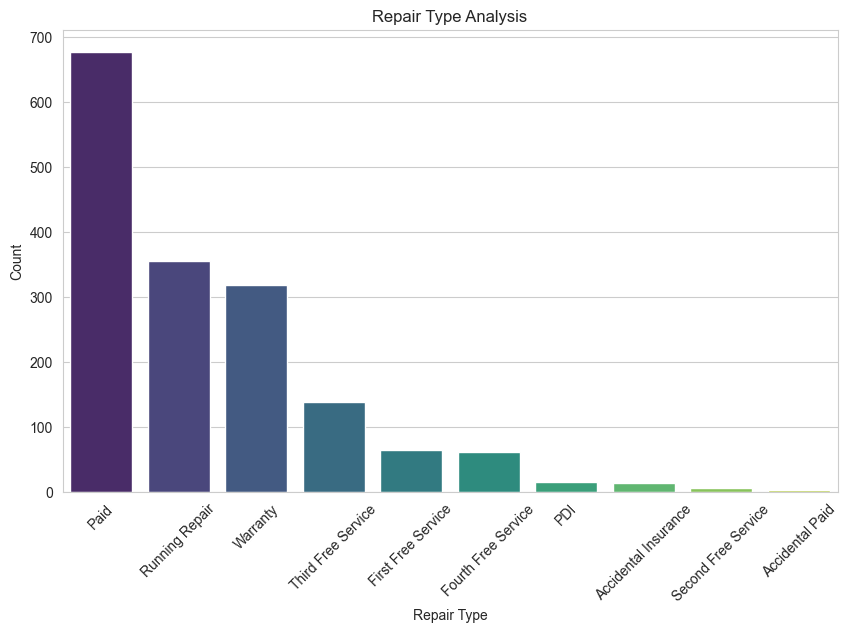

In [136]:
# Count of each repair type
repair_type_counts = df['Repair Type'].value_counts()
print("Repair Type Analysis:")
print(repair_type_counts)
# Count of each repair type
repair_type_counts = df['Repair Type'].value_counts()

# Plotting the count of each repair type
plt.figure(figsize=(10, 6))
sns.barplot(x=repair_type_counts.index, y=repair_type_counts.values, palette="viridis")
plt.title('Repair Type Analysis')
plt.xlabel('Repair Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**10. Geographical Analysis**:
   Analyze the distribution of service records by region, state, and city to identify any geographical patterns or trends.


Geographical Analysis:
Region Counts:
Region
South    1146
North     314
West      182
East       13
Name: count, dtype: int64

State Counts:
State
Karnataka      622
Telangana      401
Delhi          170
HARYANA        144
Gujarat        128
TamilNadu      123
Maharashtra     54
West Bengal     13
Name: count, dtype: int64

City Counts:
City
Bengaluru    622
HYDERABAD    401
GURUGRAM     144
Delhi.       139
Ahmedabad    128
Chennai      123
New Delhi     31
Thane         23
MUMBAI        19
Kolkata       13
Pune          12
Name: count, dtype: int64


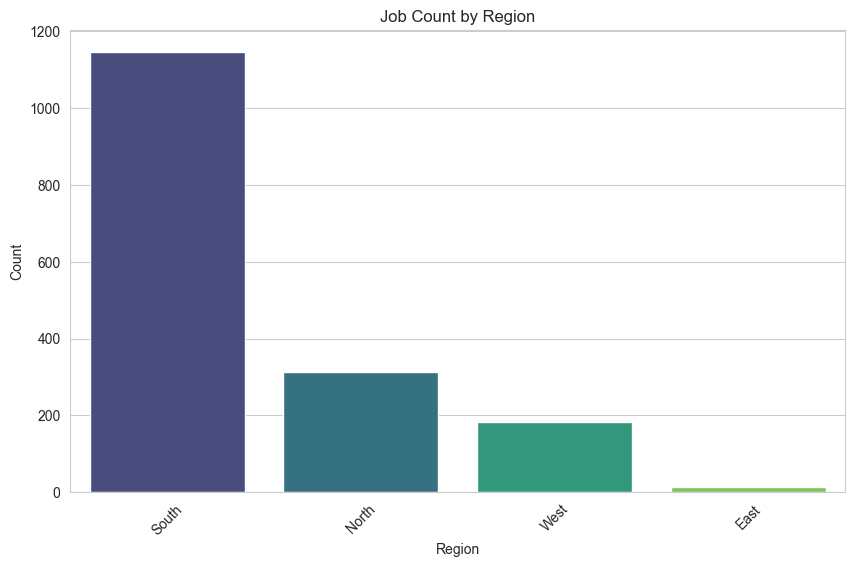

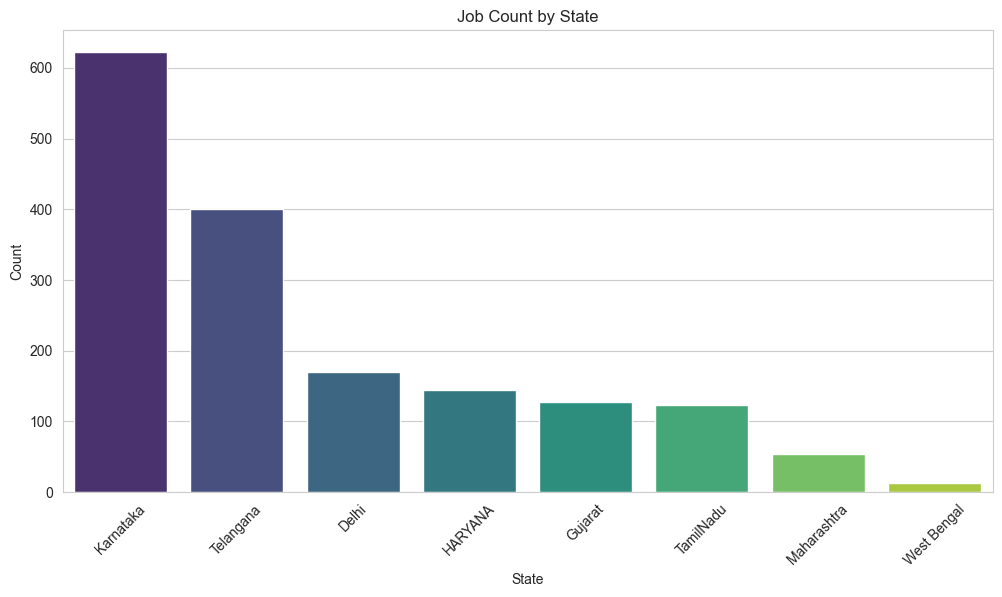

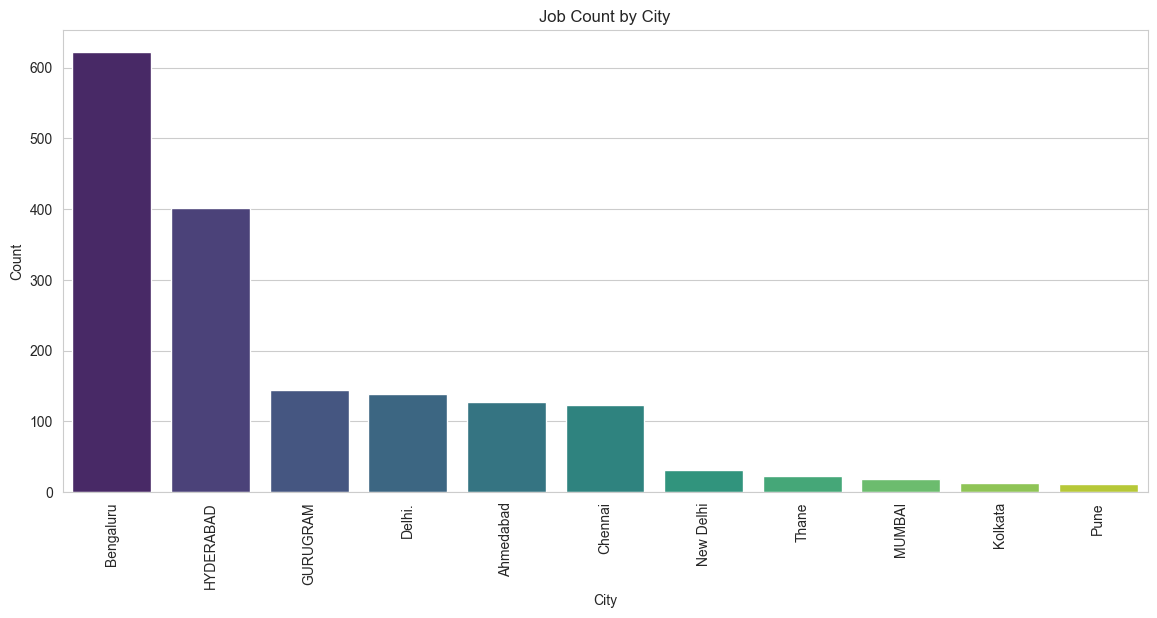

In [137]:
# Count of jobs by region, state, and city
region_counts = df['Region'].value_counts()
state_counts = df['State'].value_counts()
city_counts = df['City'].value_counts()

print("Geographical Analysis:")
print("Region Counts:")
print(region_counts)
print("\nState Counts:")
print(state_counts)
print("\nCity Counts:")
print(city_counts)

# Plotting the count of jobs by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title('Job Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the count of jobs by state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title('Job Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the count of jobs by city
plt.figure(figsize=(14, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title('Job Count by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


**11. Customer Analysis**:
   Analyze customer behavior, such as the frequency of visits, types of repairs requested, and total expenditure.

                                  Customer  Visit Frequency  \
0          3 ECO SYSTEMS PRIVATE LIMITED                  1   
1             CABT ELEKTRA PRIVATE LIMITED                3   
2                DARSHEEL QUICK TRANSPORTS                1   
3         ELEKTROWAGEN  MOTORS THREE LLP                 17   
4             ELEKTROWAGEN MOTOR THREE LLP               12   
5           ELEKTROWAGEN MOTOR THREE LLP                  2   
6                      ELEKTROWAGEN MOTORS               30   
7                ELEKTROWAGEN MOTORS LLP                 17   
8            ELEKTROWAGEN MOTORS THREE LLP               15   
9          ELEKTROWAGEN MOTORS THREE LLP                 84   
10       EXPONENT ENERGY PRIVATE LIMITED                  1   
11          Elektrowagen Motors Four LLP                  1   
12           Elektrowagen Motors One LLP                  4   
13         Exponent Energy Private Limited               28   
14   LIGHTNING LOGISTICS PRIVATE LIMITED               

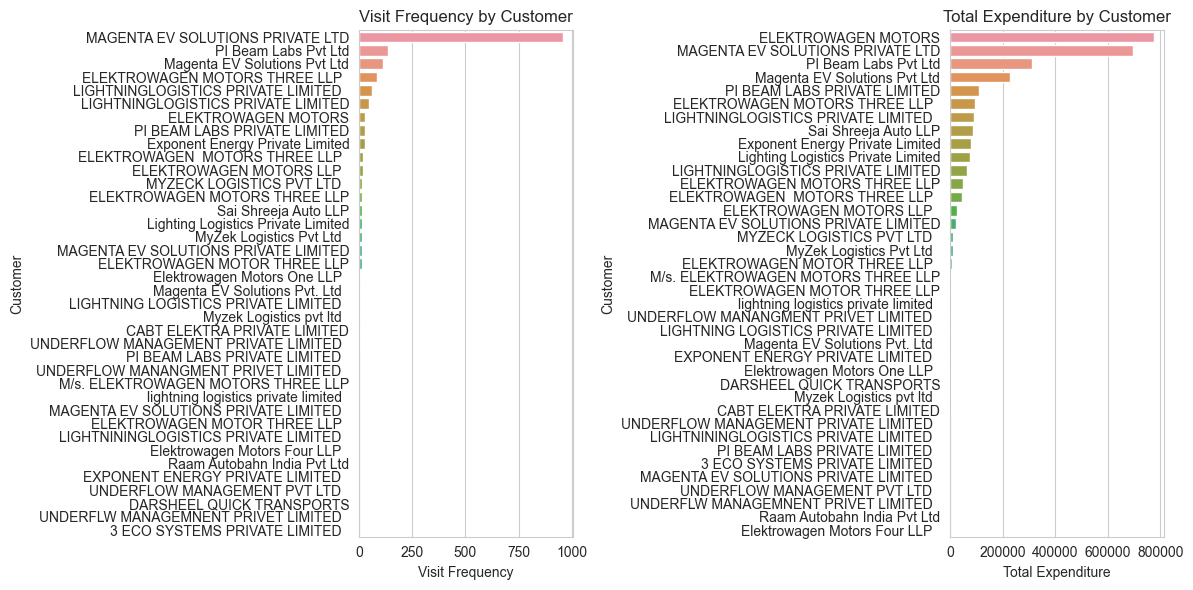

In [138]:
# Extracting year and month from 'Job Card Date' for analysis
df['YearMonth'] = df['Job Card Date'].dt.to_period('M')

# Grouping by Customer and calculating the frequency of visits, types of repairs requested, and total expenditure
customer_analysis = df.groupby('Customer').agg({
    'Job Card': 'count',
    'Repair Type': pd.Series.mode,
    'Total Amount': 'sum'
}).reset_index()

customer_analysis.columns = ['Customer', 'Visit Frequency', 'Most Frequent Repair', 'Total Expenditure']

print(customer_analysis)

# Visualizing using matplotlib and seaborn
plt.figure(figsize=(12, 6))

# Plotting visit frequency
plt.subplot(1, 2, 1)
sns.barplot(x='Visit Frequency', y='Customer', data=customer_analysis.sort_values(by='Visit Frequency', ascending=False))
plt.title('Visit Frequency by Customer')
plt.xlabel('Visit Frequency')
plt.ylabel('Customer')

# Plotting total expenditure
plt.subplot(1, 2, 2)
sns.barplot(x='Total Expenditure', y='Customer', data=customer_analysis.sort_values(by='Total Expenditure', ascending=False))
plt.title('Total Expenditure by Customer')
plt.xlabel('Total Expenditure')
plt.ylabel('Customer')

plt.tight_layout()
plt.show()

**12. Service History Analysis**:
   Extract insights from the service history data, such as the frequency of free services, warranty repairs, and general checkups.

Repair Type:
Repair Type
Paid                    677
Running Repair          355
Warranty                318
Third Free Service      139
First Free Service       65
Fourth Free Service      61
PDI                      16
Accidental Insurance     14
Second Free Service       7
Accidental Paid           3
Name: count, dtype: int64


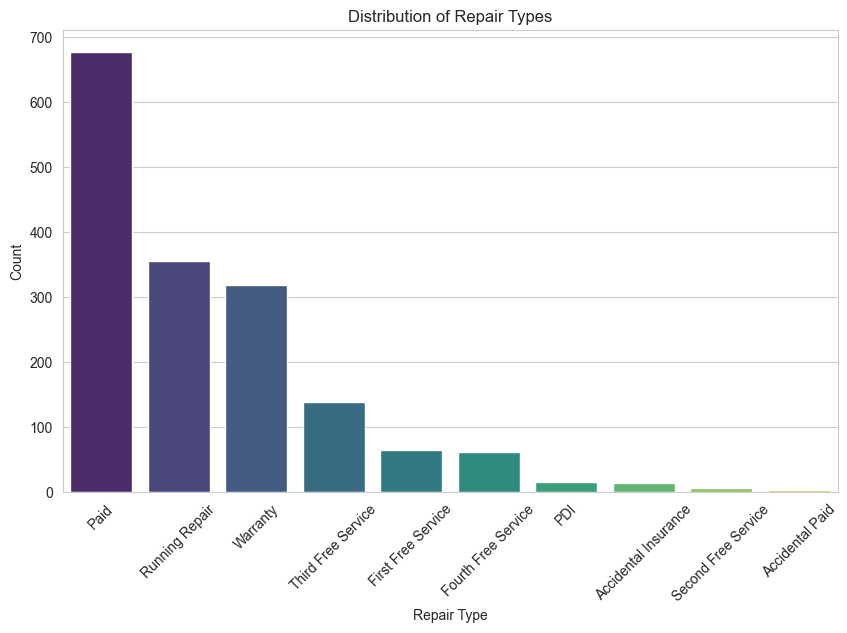

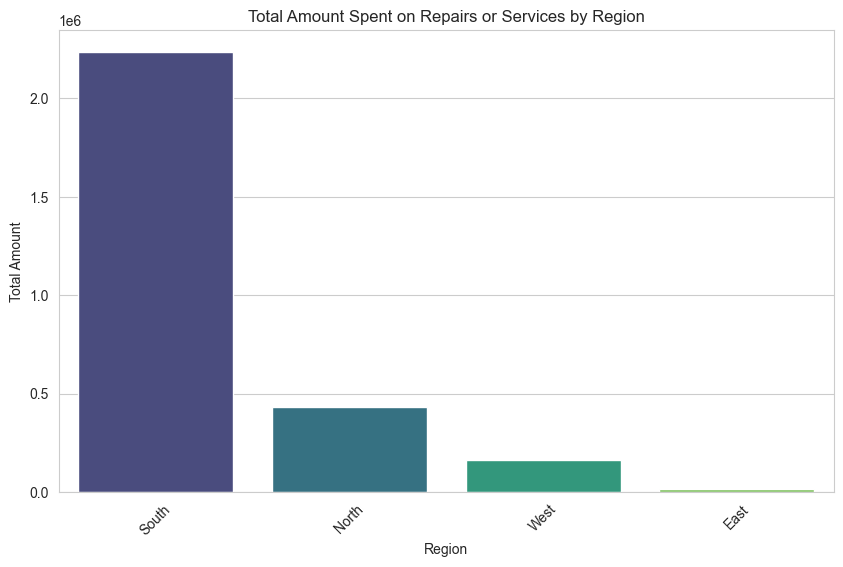

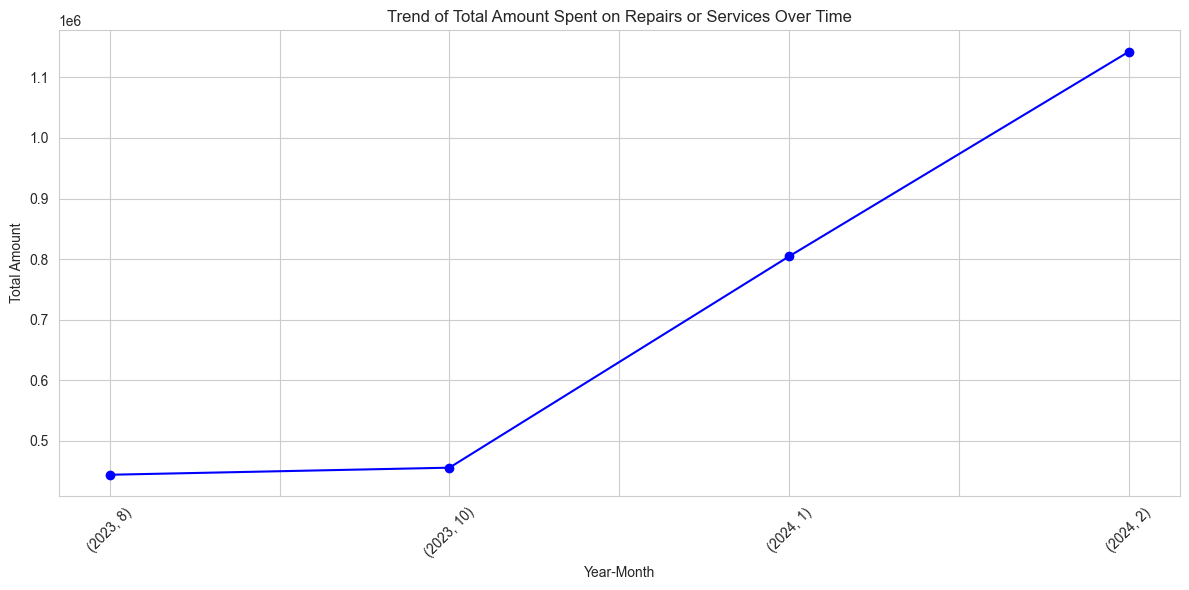

In [139]:
# Service History Analysis - Distribution of Repair Types
repair_type_counts = df['Repair Type'].value_counts()
print("Repair Type:")
print(repair_type_counts)

# Plotting the distribution of repair types
plt.figure(figsize=(10, 6))
sns.barplot(x=repair_type_counts.index, y=repair_type_counts.values, palette="viridis")
plt.title('Distribution of Repair Types')
plt.xlabel('Repair Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Service History Analysis - Total Amount Spent on Repairs or Services
total_amount_by_region = df.groupby('Region')['Total Amount'].sum().sort_values(ascending=False)

# Plotting the total amount spent on repairs or services by region
plt.figure(figsize=(10, 6))
sns.barplot(x=total_amount_by_region.index, y=total_amount_by_region.values, palette="viridis")
plt.title('Total Amount Spent on Repairs or Services by Region')
plt.xlabel('Region')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

# Service History Analysis - Trends over Time (if applicable)
# Assuming 'Job Card Date' is in datetime format, if not, convert it to datetime first
df['Job Card Date'] = pd.to_datetime(df['Job Card Date'])

# Extracting year and month from Job Card Date
df['Year'] = df['Job Card Date'].dt.year
df['Month'] = df['Job Card Date'].dt.month

# Total amount spent on repairs or services over time
total_amount_over_time = df.groupby(['Year', 'Month'])['Total Amount'].sum()

# Plotting the trend of total amount spent over time
plt.figure(figsize=(12, 6))
total_amount_over_time.plot(marker='o', color='b')
plt.title('Trend of Total Amount Spent on Repairs or Services Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**13. Work Status Analysis**:
   Analyze the work status descriptions to identify common issues or tasks performed during service visits.

Work Status Analysis:
Work Status
1/1 Parts Job Done , 1/1 RO Job Done.                          1052
2/2 Parts Job Done , 1/1 RO Job Done.                            90
1/1 RO Job Done.                                                 77
1/1 WO Job Done.                                                 40
2/2 Parts Job Done , 2/2 RO Job Done.                            33
3/3 Parts Job Done , 1/1 RO Job Done.                            27
2/2 RO Job Done.                                                 25
3/3 RO Job Done.                                                 22
3/3 Parts Job Done , 2/2 RO Job Done.                            20
1/1 Parts Job Done , 2/2 RO Job Done.                            18
4/4 Parts Job Done , 2/2 RO Job Done.                            17
4/4 Parts Job Done , 1/1 RO Job Done.                            14
4/4 Parts Job Done , 3/3 RO Job Done.                            12
5/5 Parts Job Done , 3/3 RO Job Done.                            12
5/5 Parts Job 

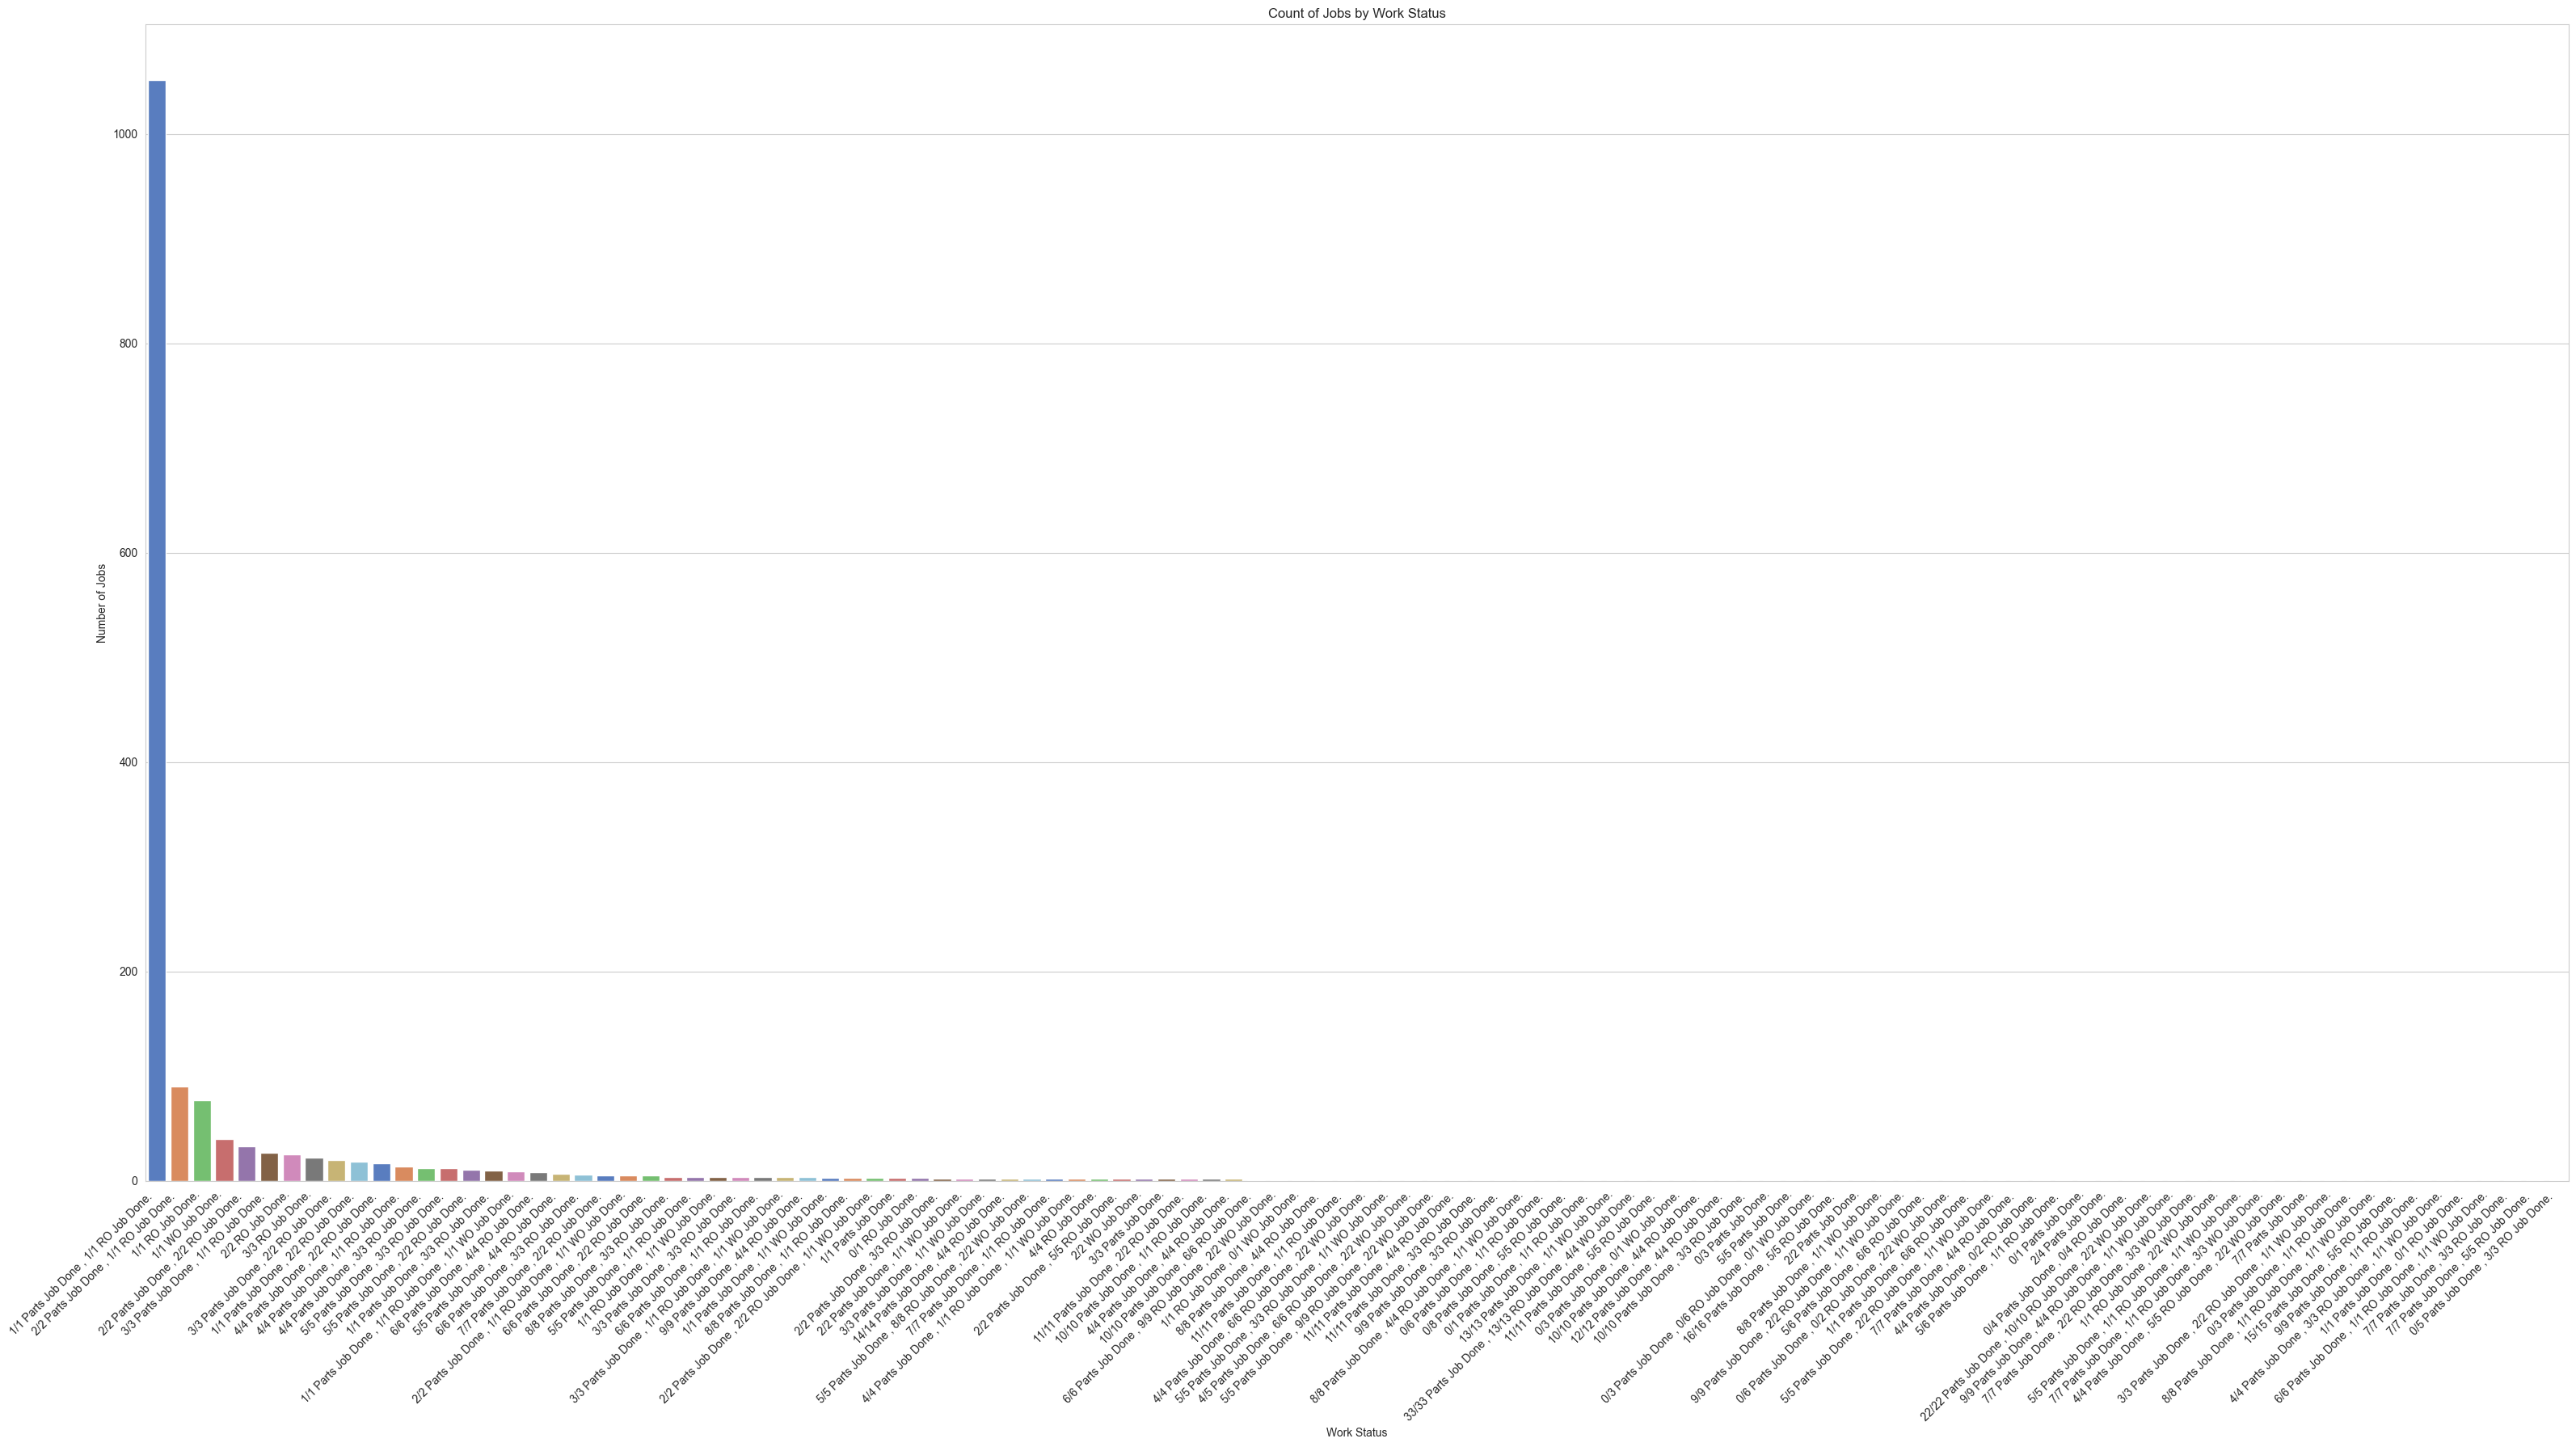

In [140]:
# Count of jobs by work status
work_status_counts = df['Work Status'].value_counts()
print("Work Status Analysis:")
print(work_status_counts)
# Plotting the count of jobs by work status
plt.figure(figsize=(32, 18))
sns.barplot(x=work_status_counts.index, y=work_status_counts.values, palette="muted")
plt.title('Count of Jobs by Work Status')
plt.xlabel('Work Status')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**14. Time Analysis**:
   Analyze the timestamps to identify patterns related to the time of day, day of the week, or month when service visits are most frequent.

time_of_day_counts
Job Card Date
9      31
10    140
11    193
12    192
13    175
14    163
15    220
16    235
17    188
18     98
19     17
21      2
23      1
dtype: int64
day_of_week_counts
Day_of_Week
0    233
1    349
2    278
3    334
4    243
5    209
6      9
dtype: int64
month_counts
Month
1     305
2     285
8     272
10    793
dtype: int64


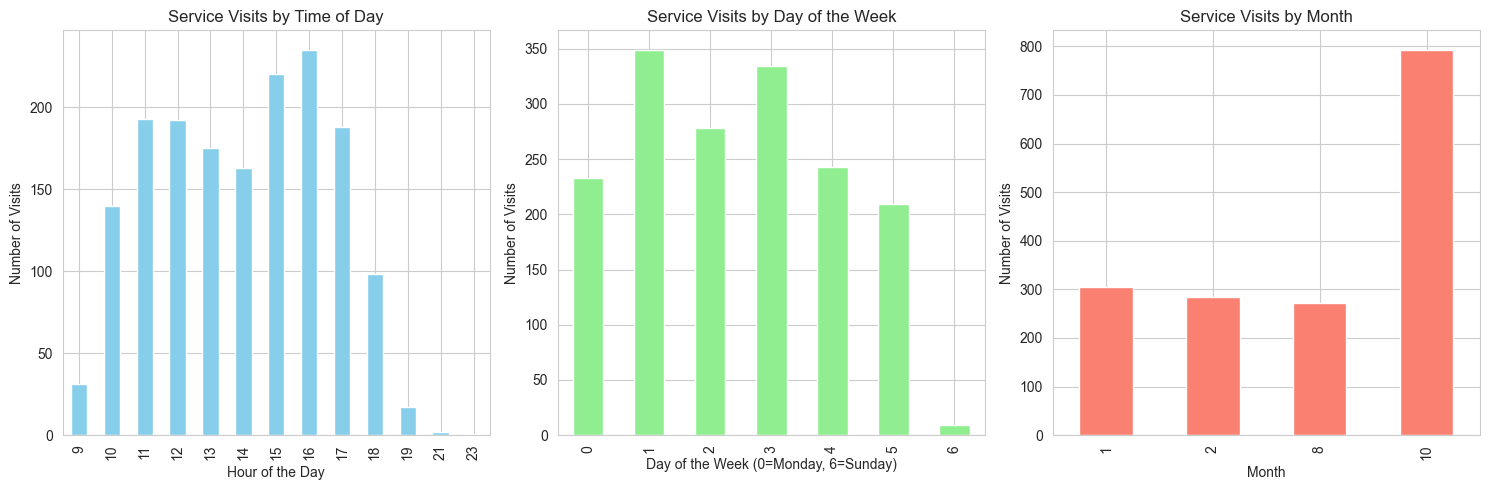

In [141]:
# Convert 'Job Card Date' to datetime format
df['Job Card Date'] = pd.to_datetime(df['Job Card Date'])

# Extract date, time, day of the week, and month
df['Date'] = df['Job Card Date'].dt.date
df['Time'] = df['Job Card Date'].dt.time
df['Day_of_Week'] = df['Job Card Date'].dt.dayofweek
df['Month'] = df['Job Card Date'].dt.month

# Group by time of day
time_of_day_counts = df.groupby(df['Job Card Date'].dt.hour).size()
print('time_of_day_counts')
print(time_of_day_counts)

# Group by day of the week
day_of_week_counts = df.groupby(df['Day_of_Week']).size()
print('day_of_week_counts')
print(day_of_week_counts)

# Group by month
month_counts = df.groupby(df['Month']).size()
print('month_counts')
print(month_counts)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
time_of_day_counts.plot(kind='bar', color='skyblue')
plt.title('Service Visits by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')

plt.subplot(1, 3, 2)
day_of_week_counts.plot(kind='bar', color='lightgreen')
plt.title('Service Visits by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Visits')

plt.subplot(1, 3, 3)
month_counts.plot(kind='bar', color='salmon')
plt.title('Service Visits by Month')
plt.xlabel('Month')
plt.ylabel('Number of Visits')

plt.tight_layout()
plt.show()



**15. Discount Analysis**:
   Analyze the distribution of discounts applied to service visits to understand the pricing strategy and customer behavior.

Discount Analysis:
count    1655.000000
mean        0.370255
std         5.210260
min         0.000000
25%         0.000000
50%         0.010000
75%         0.370255
max       150.000000
Name: Discount, dtype: float64


C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


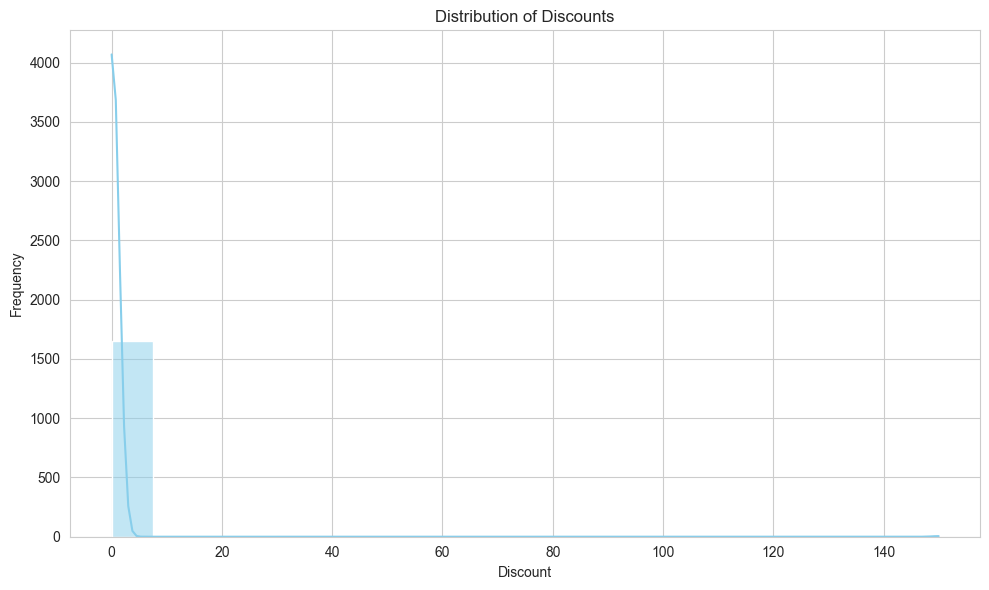

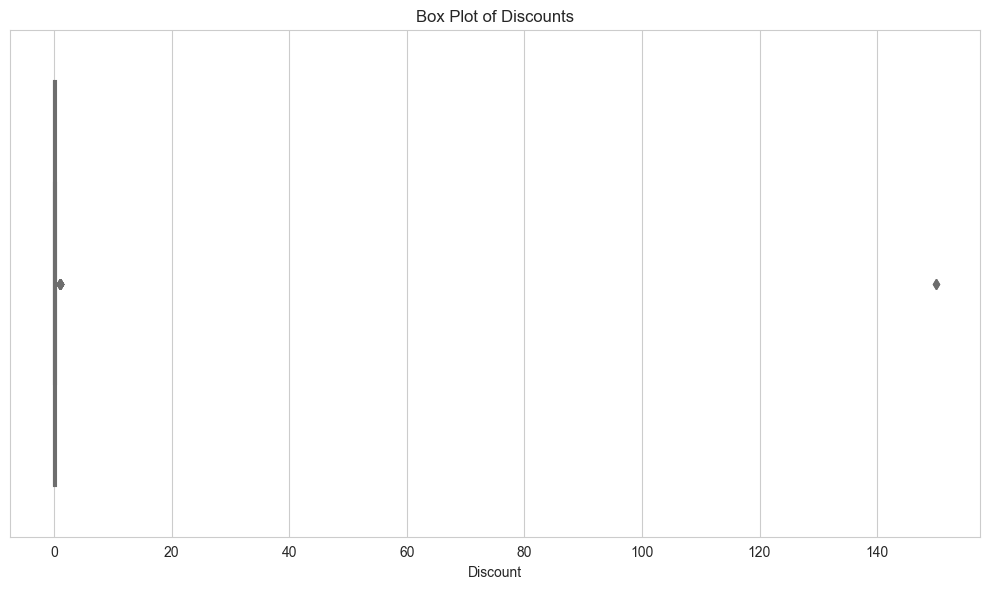

In [142]:
# Summary statistics of discount
discount_stats = df['Discount'].describe()
print("Discount Analysis:")
print(discount_stats)
# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the histogram of discount
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting the box plot of discount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Discount'], color='salmon')
plt.title('Box Plot of Discounts')
plt.xlabel('Discount')
plt.tight_layout()
plt.show()

**16. Total Amount Analysis**:
    Analyze the total amount spent on each service visit to identify outliers and trends in expenditure.


Total Amount Analysis:
count      1655.000000
mean       1720.260553
std        7964.723694
min           0.000000
25%         228.804750
50%         562.370000
75%        1558.000000
max      137047.090000
Name: Total Amount, dtype: float64


C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


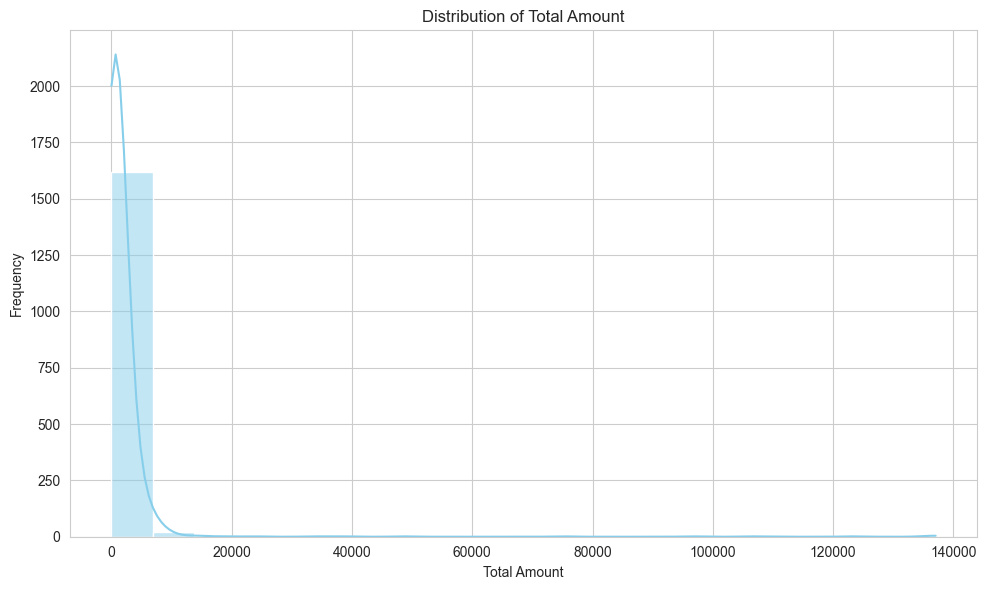

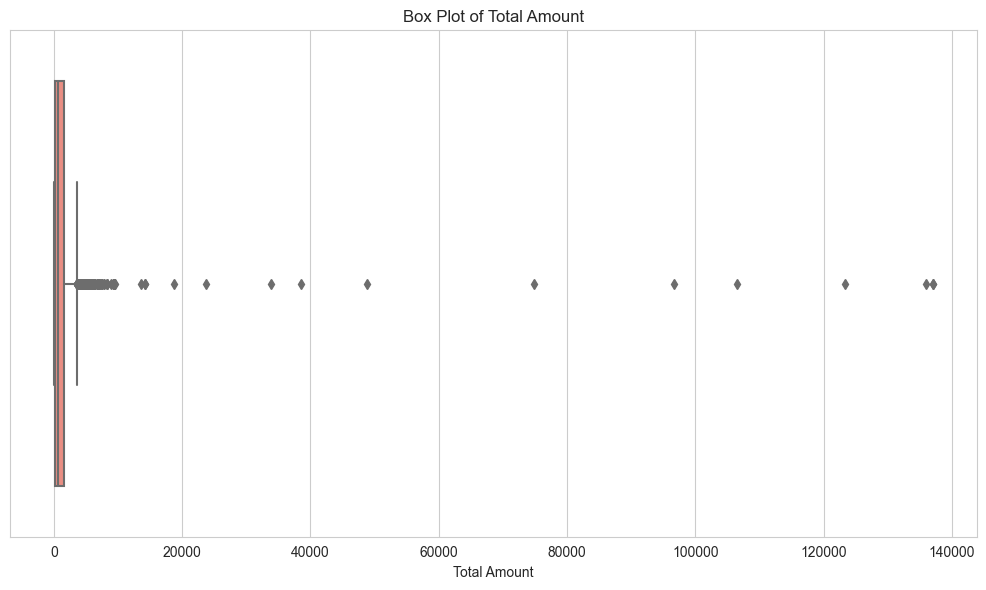

In [143]:
# Summary statistics of total amount
total_amount_stats = df['Total Amount'].describe()
print("Total Amount Analysis:")
print(total_amount_stats)
# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the histogram of total amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting the box plot of total amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total Amount'], color='salmon')
plt.title('Box Plot of Total Amount')
plt.xlabel('Total Amount')
plt.tight_layout()
plt.show()


**17. Top customers:-** Top customers by number of jobs

Top Customers:
Customer
MAGENTA EV SOLUTIONS PRIVATE LTD        958
PI Beam Labs Pvt Ltd                    135
Magenta EV Solutions Pvt Ltd            112
ELEKTROWAGEN MOTORS THREE LLP            84
LIGHTNINGLOGISTICS PRIVATE LIMITED       62
LIGHTNINGLOGISTICS PRIVATE LIMITED       47
ELEKTROWAGEN MOTORS                      30
PI BEAM LABS PRIVATE LIMITED             29
Exponent Energy Private Limited          28
ELEKTROWAGEN MOTORS LLP                  17
Name: count, dtype: int64


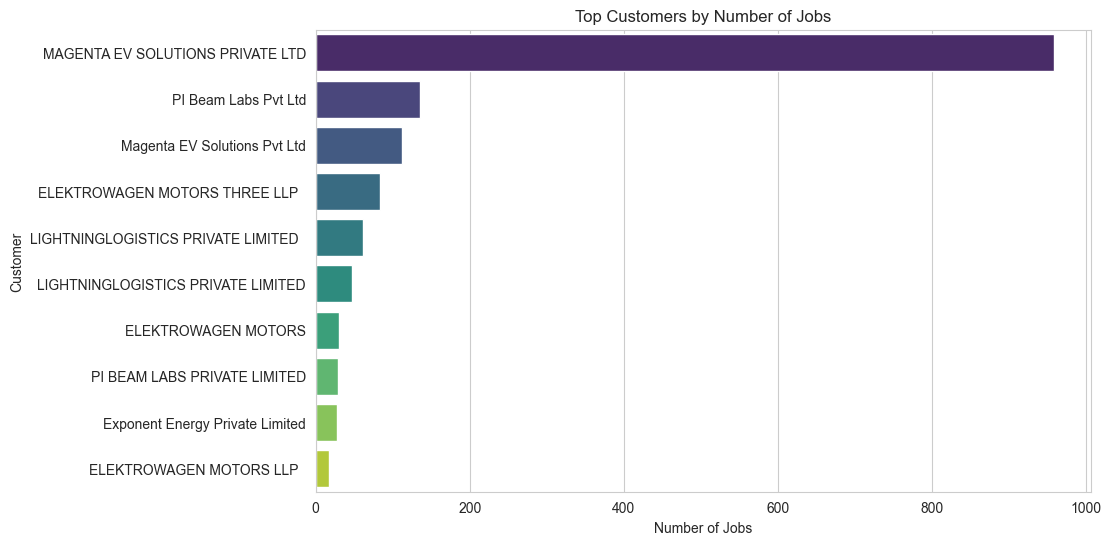

In [144]:
top_customers = df['Customer'].value_counts().head(10)
print("Top Customers:")
print(top_customers)
# Plotting the top customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")
plt.title('Top Customers by Number of Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Customer')
plt.show()


**Thank you**